Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Circle)
Info    : [ 60%] Meshing curve 2 (Circle)
Info    : Done meshing 1D (Wall 0.0122625s, CPU 0.011484s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.0170962s, CPU 0.017118s)
Info    : 373 nodes 748 elements
Triangle 3


<Axes: xlabel='x1', ylabel='x2'>

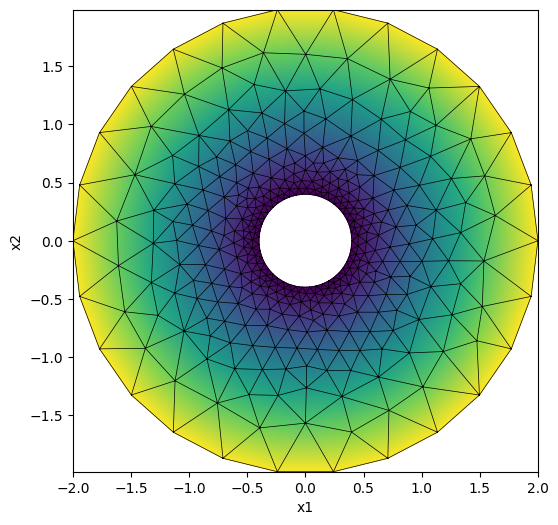

In [1]:
import meshBuilder
import matplotlib.pyplot as plt
import numpy as np
import distanceField
mesh0, b0 = meshBuilder.buildMesh_tri_cylinder_gmsh(
    x0=[0, 0],
    r_inner=0.4,
    r_outer=2,
    lc=0.5,
    lc_inner=0.05
)
d0 = distanceField.get_mesh_nodal_wall_distance(mesh0,b0)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
mesh0.plot_image(ax=ax, v=d0, v_type="N")
mesh0.plot_grid(ax=ax, linewidth=0.5, color="k")


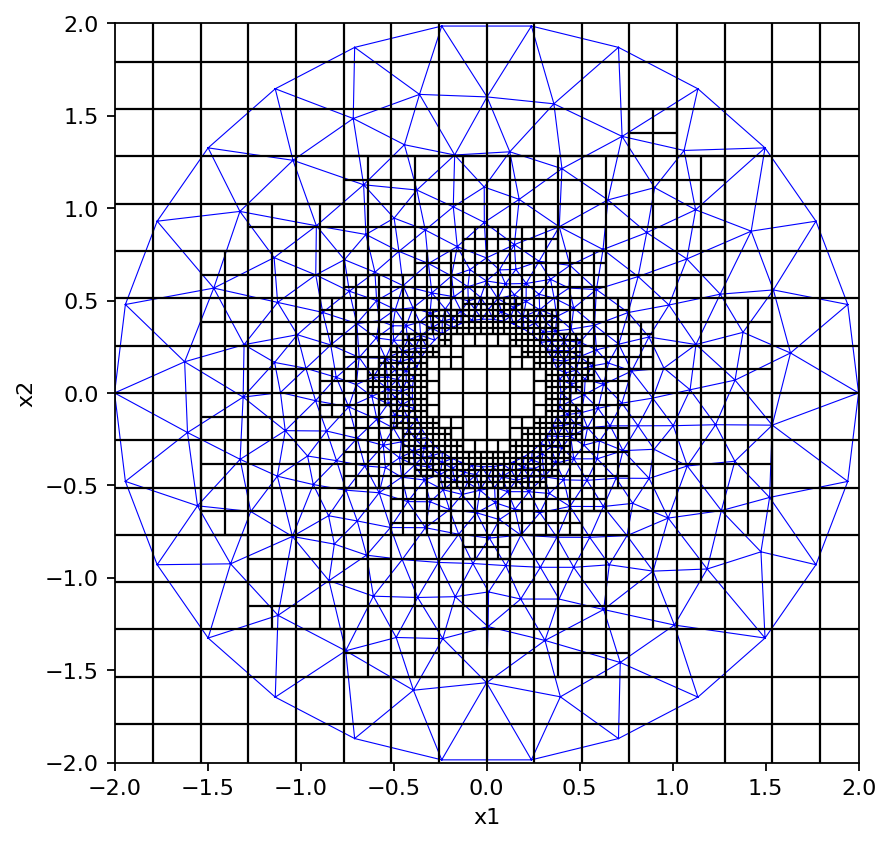

In [2]:
import meshHelper

h0 = 0.001
meshB, nLevel = meshBuilder.buildMesh_quadTree(h0, h0, 100, 100)
meshHelper.refine_tree_mesh_by_tri(meshB, h0, nLevel, mesh0)


meshB.finalize()

fig = plt.figure(figsize=(6, 6), dpi=160)
ax = fig.add_subplot(111)
meshB.plot_grid(ax=ax, color="k", linewidth=1.0)
mesh0.plot_grid(ax=ax, color="b", linewidth=0.5)
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.grid(False)


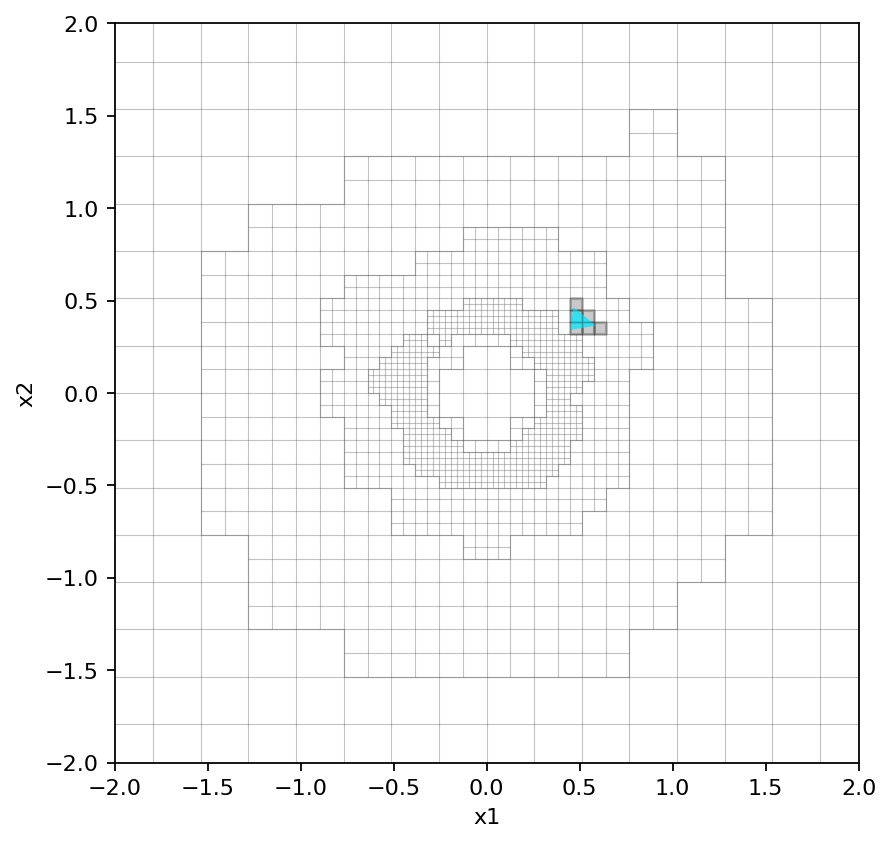

In [5]:
import meshPlotUtils

B_cells_on_M0, M0_cells_on_B = meshHelper.get_tri_to_tree_intersect(meshB, mesh0)

iM0Check = 12
fig = plt.figure(123, figsize=(6, 6), dpi=160)
ax = fig.add_subplot(111)
meshPlotUtils.plot_mesh_mono(
    meshB,
    ax=ax,
    cell_mask=np.isin(np.arange(meshB.n_cells), B_cells_on_M0[iM0Check]),
    # cell_mask=np.asarray([v.size > 0 for v in M0_cells_on_B], dtype=np.bool),
    linecolor="#43434352",
    facecolor="#43434349",
)
meshPlotUtils.plot_mesh_mono(
    mesh0,
    ax=ax,
    cell_mask=np.isin(np.arange(mesh0.n_cells), np.asarray([iM0Check])),
    linecolor="#00FFFB00",
)

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.grid(False)